In [1]:
%matplotlib inline

In [2]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
import utils; reload(utils)
from utils import plots

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


In [16]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [17]:
%ls ../../../

anaconda2/  data/  downloads/  fastai_course/


In [23]:
#path = "../../../data/dogscats/"
path = "../../../data/dogscats/sample/"
result_path = "../../../data/dogscats/results/"
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64
epochs = 10


In [24]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
print(batches.class_indices)
print(val_batches.class_indices)
print(batches.num_classes)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}
2


In [25]:
vgg.finetune(batches)
#vgg.model.summary()

In [26]:
#vgg.finetune(batches)
from keras.callbacks import ModelCheckpoint
saved_weights_path = path + '/weights/sample.epoch_{epoch:02d}-valloss_{val_loss:.2f}.hdf5'
mcp = ModelCheckpoint(saved_weights_path, monitor='val_loss', save_weights_only=True, mode='auto', period=1)
call_backs = [mcp]
h = vgg.fit(batches, val_batches, nb_epoch=epochs, batch_size = batch_size, callbacks=call_backs)

Epoch 1/10
1/0 [================================================================================================] - 3s 3s/step - loss: 2.0785 - acc: 0.3500 - val_loss: 0.6080 - val_acc: 0.6000
Epoch 2/10
1/0 [================================================================================================] - 3s 3s/step - loss: 1.1218 - acc: 0.7000 - val_loss: 0.4084 - val_acc: 0.8000
Epoch 3/10
1/0 [================================================================================================] - 3s 3s/step - loss: 0.7234 - acc: 0.8500 - val_loss: 0.3633 - val_acc: 0.8000
Epoch 4/10
1/0 [================================================================================================] - 3s 3s/step - loss: 0.3745 - acc: 0.8500 - val_loss: 0.3030 - val_acc: 0.8500
Epoch 5/10
1/0 [================================================================================================] - 3s 3s/step - loss: 0.1999 - acc: 0.9500 - val_loss: 0.2316 - val_acc: 0.8500
Epoch 6/10
1/0 [===================

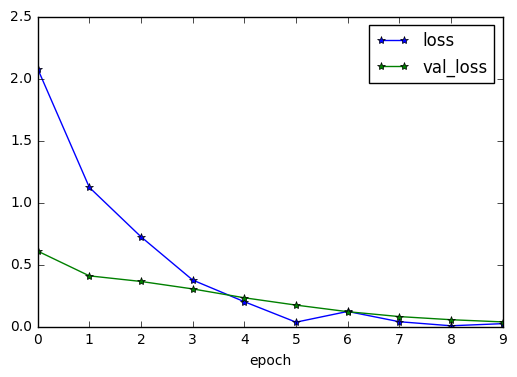

In [36]:
#print(dir(h))
import pandas as pd
df = pd.DataFrame(h.history)
df['epoch'] =df.index
df.plot(x='epoch', y=['loss', 'val_loss'], style='*-')

In [76]:
vgg.model.save_weights(result_path + '/temp.h5')

In [89]:
from keras import backend as K
K.set_value(vgg.model.optimizer.lr, 0.01) # (default =0.001)

In [90]:
vgg.model.optimizer.get_config()

{'beta_1': 0.8999999761581421,
 'beta_2': 0.9990000128746033,
 'decay': 0.0,
 'epsilon': 1e-08,
 'lr': 0.009999999776482582}

In [99]:
#Adding transformations
epochs = 5
from keras.preprocessing import image
train_transformed = vgg.get_batches(path+"train", batch_size=batch_size, gen=image.ImageDataGenerator(shear_range=0.1,rotation_range=5,vertical_flip=True,width_shift_range=0.02, height_shift_range=0.02 ))
vgg.fit(train_transformed, val_batches, nb_epoch=epochs)

Found 23000 images belonging to 2 classes.
Epoch 1/5
23000/23000 [==============================] - 623s - loss: 0.3319 - acc: 0.9119 - val_loss: 0.0889 - val_acc: 0.9740
Epoch 2/5
23000/23000 [==============================] - 622s - loss: 0.2836 - acc: 0.9197 - val_loss: 0.0831 - val_acc: 0.9740
Epoch 3/5
23000/23000 [==============================] - 621s - loss: 0.2668 - acc: 0.9226 - val_loss: 0.0587 - val_acc: 0.9795
Epoch 4/5
23000/23000 [==============================] - 621s - loss: 0.2640 - acc: 0.9236 - val_loss: 0.0598 - val_acc: 0.9795
Epoch 5/5
23000/23000 [==============================] - 622s - loss: 0.2765 - acc: 0.9198 - val_loss: 0.0767 - val_acc: 0.9815


In [80]:
train_transformed = vgg.get_batches(path+"train", batch_size=batch_size, gen=image.ImageDataGenerator(rotation_range=5))
vgg.fit(train_transformed, val_batches, nb_epoch=epochs)

Found 23000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 611s - loss: 0.1641 - acc: 0.9642 - val_loss: 0.0499 - val_acc: 0.9850


In [83]:
train_transformed = vgg.get_batches(path+"train", batch_size=batch_size, gen=image.ImageDataGenerator(vertical_flip=True))
vgg.fit(train_transformed, val_batches, nb_epoch=epochs)

Found 23000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 613s - loss: 0.4193 - acc: 0.9169 - val_loss: 0.0855 - val_acc: 0.9805


In [86]:
train_transformed = vgg.get_batches(path+"train", batch_size=batch_size, gen=image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1))
vgg.fit(train_transformed, val_batches, nb_epoch=epochs)

Found 23000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 611s - loss: 0.1130 - acc: 0.9745 - val_loss: 0.0831 - val_acc: 0.9790


# ---------------------------------------------------------

In [18]:
test_batches, predictions = vgg.test(path+'test', batch_size)

Found 12500 images belonging to 1 classes.


In [77]:
#print(test_batches.filenames[0:10])
#print(predictions.shape)

['fakeclass/9292.jpg', 'fakeclass/12026.jpg', 'fakeclass/9688.jpg', 'fakeclass/4392.jpg', 'fakeclass/779.jpg', 'fakeclass/2768.jpg', 'fakeclass/2399.jpg', 'fakeclass/12225.jpg', 'fakeclass/10947.jpg', 'fakeclass/1780.jpg']
(12500, 2)


In [19]:
#Return image ID from its name
def get_id(img_path):
    fid = img_path.split("/")[1].split(".")[0] #Get image ID
    return fid

ids = []
dog_probs = []
for img_path,pred in zip(test_batches.filenames, predictions):
    fid = get_id(img_path)
    dog_prob = pred[1]
    ids.append(fid)
    dog_probs.append(dog_prob)
    
df = pd.DataFrame({"id":ids, "label":dog_probs})
#print(df)
fn = "./sub/train4_batchsize" + str(batch_size) + "_epochs" + str(epochs) +"_lr0.01.csv"
df.to_csv(fn, index=False)
print("Write to " + fn)
print("DONE!")
from IPython.display import FileLink
FileLink(fn)  

Write to ./sub/train4_batchsize90_epochs1_lr0.01.csv
DONE!


/home/ubuntu/nbs/ml/sub/train4_batchsize90_epochs1_lr0.01.csv

# Create augmented images

In [11]:
import os
from keras.preprocessing import image

dim_ordering = 'th'
def mkdirp(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

def save_img(img_data, prefix, out_path, img_name, is_scale):
    img = image.array_to_img(img_data, dim_ordering, scale=is_scale)
    fname = '{prefix}_{img_name}'.format(prefix= prefix, img_name=img_name)
    #print(out_path)
    #print(fname)
    img.save(os.path.join(out_path, fname))
    
transform = 'zoom'
gen=image.ImageDataGenerator(zoom_range=0.2) #shear_range=5, horizontal_shift=True, rotation_range = 10, shift = 0.1

base_path = "data/dogscats/"
train_path = base_path + '/train'

out_path = base_path + 'train_' + transform
mkdirp(out_path)
batches = gen.flow_from_directory(train_path, shuffle=False, batch_size=1)
print('image shape: ')
print(batches.image_shape)
print('image dim_ordering: ')
print(batches.dim_ordering)
counts = len(batches.filenames)
print('Total number of images: %d' %counts)
for idx in range(len(batches.filenames)):
    if(idx >= 2000 and idx %2000 == 0):
        print('Processed %d'%idx)
    img = batches.filenames[idx]
    cls = img.split("/")[0]
    fn = img.split("/")[1]
    dat = batches.next()
    outp = out_path + '/' + cls
    mkdirp(outp)
    #print(len(dat))
    #print(dat[0].shape)
    #print(dat[1].shape)
    save_img(dat[0][0], transform, outp, fn, is_scale=True)
    
print('Completed generating %s-ed images!'%transform)    
    
    
        

    

Found 23000 images belonging to 2 classes.
image shape: 
(3, 256, 256)
image dim_ordering: 
th
Total number of images: 23000
Processed 2000
Processed 4000
Processed 6000
Processed 8000
Processed 10000
Processed 12000
Processed 14000
Processed 16000
Processed 18000
Processed 20000
Processed 22000
Completed generating zoom-ed images!


In [ ]:
# Training History
Train Session 1:
1. Base line train: re-pull code from github, re-wrote the code to run the deep learning, used default batch_size = 64, epochs =1
    Epoch 1/1
23000/23000 [==============================] - 612s - loss: 0.1197 - acc: 0.9684 - val_loss: 0.0665 - val_acc: 0.9830
Test score: 0.17580, filename: batchsize64_epochs1_base.csv

2. Trained based on the base line model, added shear_range = 0.1
Epoch 1/1
23000/23000 [==============================] - 613s - loss: 0.1014 - acc: 0.9756 - val_loss: 0.0667 - val_acc: 0.9810
Test score: 0.16436, filename: batchsize64_epochs1_base_shear.csv    

3. base + shear + rotate (30)
Epoch 1/1
23000/23000 [==============================] - 611s - loss: 0.1641 - acc: 0.9642 - val_loss: 0.0499 - val_acc: 0.9850
Test score: 0.17411, filename: batchsize64_epochs1_base_shear_rotate.csv  

4. base + shear + rotate + vertical flip
23000/23000 [==============================] - 613s - loss: 0.4193 - acc: 0.9169 - val_loss: 0.0855 - val_acc: 0.9805
Test score: 0.16267, filename: batchsize64_epochs1_base_shear_rotate_flip.csv  

5. base + shear + rotate + flip + shift (width+height:0.1)
23000/23000 [==============================] - 611s - loss: 0.1130 - acc: 0.9745 - val_loss: 0.0831 - val_acc: 0.9790
Test score: 0.17426, filename: batchsize64_epochs1_base_shear_rotate_flip_shift.csv  

6. changed batch_size = 90, retrain the raw images based on the model from step 1-5
23000/23000 [==============================] - 613s - loss: 0.0936 - acc: 0.9794 - val_loss: 0.0754 - val_acc: 0.9825
Test score: 0.19362, filename: batchsize90_epochs1_base_shear_rotate_flip_shift.csv

Train Session 2:        
1. batch_size = 90, epochs = 1, start afresh
23000/23000 [==============================] - 620s - loss: 0.1285 - acc: 0.9656 - val_loss: 0.0559 - val_acc: 0.9830
Test score: 0.13399, filename: train2_batchsize90_epochs1.csv

2. batch_size = 90, epochs = 5, added transformations       
train_transformed = vgg.get_batches(path+"train", batch_size=batch_size, gen=image.ImageDataGenerator(shear_range=0.1,rotation_range=5,vertical_flip=True,width_shift_range=0.02, height_shift_range=0.02 ))

Epoch 1/5
23000/23000 [==============================] - 623s - loss: 0.3319 - acc: 0.9119 - val_loss: 0.0889 - val_acc: 0.9740
Epoch 2/5
23000/23000 [==============================] - 622s - loss: 0.2836 - acc: 0.9197 - val_loss: 0.0831 - val_acc: 0.9740
Epoch 3/5
23000/23000 [==============================] - 621s - loss: 0.2668 - acc: 0.9226 - val_loss: 0.0587 - val_acc: 0.9795
Epoch 4/5
23000/23000 [==============================] - 621s - loss: 0.2640 - acc: 0.9236 - val_loss: 0.0598 - val_acc: 0.9795
Epoch 5/5
23000/23000 [==============================] - 622s - loss: 0.2765 - acc: 0.9198 - val_loss: 0.0767 - val_acc: 0.9815
In [80]:
Test score: 0.14027, filename:train2_batchsize90_epochs5_all_transforms.csv


Train Session 3: Train on each transformation separately and ensemble (with base case) with average
batch_size = 90, epochs = 1

1. train_flip
23000/23000 [==============================] - 800s - loss: 0.1288 - acc: 0.9647 - val_loss: 0.0525 - val_acc: 0.9840

Test score: 0.13822, filename: train3_batchsize90_epochs1_flip.csv

2. train_shift
23000/23000 [==============================] - 801s - loss: 0.1409 - acc: 0.9608 - val_loss: 0.0813 - val_acc: 0.9775
Test score: 0.16133, filename:train3_batchsize90_epochs1_shift.csv

3. train_rotate
23000/23000 [==============================] - 799s - loss: 0.1397 - acc: 0.9603 - val_loss: 0.0623 - val_acc: 0.9795
Test score: 0.13268, filename: train3_batchsize90_epochs1_rotate.csv

4. train_shear
23000/23000 [==============================] - 798s - loss: 0.5209 - acc: 0.8065 - val_loss: 0.0681 - val_acc: 0.9780
Test score: 0.11434, filename: train3_batchsize90_epochs1_shear.csv

5. train_zoom
23000/23000 [==============================] - 800s - loss: 0.1560 - acc: 0.9545 - val_loss: 0.0574 - val_acc: 0.9815
Test score: 0.11701, filename: train3_batchsize90_epochs1_zoom.csv

6. ensemble: average the predictions from all above
Test score: 0.10128, filename: ensemble_session1_3.csv

7. train_all: use raw and all transformed images for training
138000/138000 [==============================] - 4357s - loss: 0.1812 - acc: 0.9448 - val_loss: 0.0671 - val_acc: 0.9790
Test score: 0.15428, filename: train3_batchsize90_epochs1_all.csv

8. make 2nd to last layer trainable
23000/23000 [==============================] - 778s - loss: 0.1282 - acc: 0.9638 - val_loss: 0.0527 - val_acc: 0.9805
Test score: 0.11644 filename: train3_batchsize90_epochs1_morelayer.csv

9. make 2nd to last layer trainable + all data
138000/138000 [==============================] - 4358s - loss: 0.1796 - acc: 0.9443 - val_loss: 0.0565 - val_acc: 0.9820

Test score: 0.13980,  filename: train3_batchsize90_epochs1_morelayer_all.csv

Train Session 4:
1. train with raw images, batch_size = 90, epochs =1 once
2. change learn rate to 0.01, train twice
23000/23000 [==============================] - 783s - loss: 0.1242 - acc: 0.9680 - val_loss: 0.0552 - val_acc: 0.9845
23000/23000 [==============================] - 783s - loss: 0.1215 - acc: 0.9670 - val_loss: 0.0462 - val_acc: 0.9870
Test score: 0.13962, filename: train4_batchsize90_epochs1_lr0.01.csv
with winsorization: [0.02, 0.98], I got test score = 0.07491.

